# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
#reading twitter csv into pandas dataframe
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#using request library to get our file from the url
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
#opening our tsv file
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
#reading our tsv file into pandas dataframe
image_predictions=pd.read_csv('image-predictions.tsv',delimiter='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except AttributeError:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict);

1: 892420643555336193


Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [5]:
twitter_list = []

#Reading the .txt file into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})

In [6]:
#Converting the list of dictionaries to a pandas DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
#it seems that there are replies in the dataframe that we will want to get rid of
twitter_archive.query('in_reply_to_status_id == in_reply_to_status_id').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [12]:
twitter_archive[twitter_archive.expanded_urls.isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [13]:
twitter_archive.source[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [14]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [15]:
twitter_archive["in_reply_to_status_id"].unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [16]:
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
len(twitter_archive.query('name == "None"'))

745

In [18]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
twitter_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [22]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [23]:
twitter_data.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


In [24]:
twitter_archive.shape[0], twitter_data.shape[0] , image_predictions.shape[0]

(2356, 2354, 2075)

In [25]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Quality issues
1. doggo, floofer, pupper, and puppo have "None" instead of a null value and here are 745 records of dogs that do not contain a name for the dog and instead of a Null value it is "None".

2. Retweets need to be droped from twitter archive dataframe

3. There are replies that need to be droped from twitter archive dataframe

4. Source indicates how they were using twitter (ie: downloaded from iphone), but we can change it to a better format to help with understandability. We will change from the html to just indicate the device type it was from.

5. Timestamp should be datetime data type instead of string

6. Tweet_id is int but should be a string since it is an identifier

7. Although we do not care if the numerator is larger than the denominator we still would like to normalize the values for easier analysis.

8. In the image predictions dataframe all dog types should be capitilized in p1,p2, and p3.

### Tidiness issues
1. Dog categories "doggo,fluffer,etc" should be in one column titled Categories

2. There should be only one dataframe to hold all of our data

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [54]:
# Make copies of original pieces of data
clean_archives=twitter_archive
clean_predictions=image_predictions
clean_tw_data=twitter_data

### Issue #1:

#### Define:
Changing "None" in the dog categories and name columns to a null value.

#### Code

In [55]:
clean_archives['doggo'].replace('None', np.nan, inplace=True)
clean_archives['floofer'].replace('None', np.nan, inplace=True)
clean_archives['pupper'].replace('None', np.nan, inplace=True)
clean_archives['puppo'].replace('None', np.nan, inplace=True)
clean_archives['name'].replace('None', np.nan, inplace=True)

#### Test

In [56]:
clean_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #2:

#### Define


Getting rid of retweets

#### Code

In [57]:
clean_archives=clean_archives[clean_archives.retweeted_status_id.isnull()]

#### Test

In [58]:
clean_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        1495 non-null   object 
 13  doggo                       87 no

In [59]:
#droping the now unneeded columns
clean_archives.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True);

C:\Users\jesse\AppData\Local\Temp\ipykernel_15072\696963785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archives.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True);


### #3 Define


We must remove the rows that are are reply to another tweet. 

#### Code

In [60]:
clean_archives=clean_archives[clean_archives.in_reply_to_status_id.isnull()]

### Test

In [61]:
clean_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   1494 non-null   object 
 10  doggo                  83 non-null     object 
 11  floofer                10 non-null     object 
 12  pupper                 230 non-null    object 
 13  puppo                  24 non-null     object 
dtypes: float64(2), int64(3), object(9)
memory usage: 245.7+ 

In [62]:
#droping the now unneeded columns
clean_archives.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True);

###  #4 Define

Source column is data we are not interested in so we are going to drop the column

### Code

In [63]:
clean_archives['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [64]:
clean_archives.source=clean_archives.source.replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
       ,['iPhone', 'Web Client','Vine - Make a Scene', ' TweetDeck'])

### Test

In [65]:
clean_archives['source'].unique()

array(['iPhone', 'Web Client', 'Vine - Make a Scene', ' TweetDeck'],
      dtype=object)

### #5 Define

Change timestamp in twitter archive dataframe to a datetime data type

### Code

In [66]:
clean_archives.timestamp=pd.to_datetime(clean_archives.timestamp)

### Test

In [67]:
clean_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3

### #6 Define
Tweet_id is an integer and we should change it over to a string since it is an id

### Code

In [68]:
clean_archives.tweet_id=clean_archives.tweet_id.astype('string')
clean_predictions.tweet_id=clean_predictions.tweet_id.astype('string')
clean_tw_data.tweet_id=clean_tw_data.tweet_id.astype('string')

### Test

In [69]:
clean_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   string             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

### #7 Define
Creating a rating column for the dogs and normalizing the values for easier analysis

### Code

In [70]:
clean_archives['dog_rating']=clean_archives.rating_numerator/clean_archives.rating_denominator

In [71]:
clean_archives.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

### Test

In [72]:
clean_archives.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,NaN,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,NaN,NaN,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,NaN,NaN,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,NaN,NaN,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,NaN,NaN,NaN,1.2


###  #8 Define
Dog types in p1,p2, and p3 should be capitilized as some were and some where not

### Code

In [73]:
clean_predictions.p1=clean_predictions.p2.str.title()
clean_predictions.p2=clean_predictions.p2.str.title()
clean_predictions.p3=clean_predictions.p3.str.title()

### Test

In [74]:
clean_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Collie,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Miniature_Pinscher,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Malinois,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Redbone,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Rottweiler,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Tidiness issues

## #1

### Define

The three dataframes should be combined into one master dataframe. To do this we will also need to rename

In [75]:
clean_archives.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,NaN,NaN,1.3


### Code

In [77]:
clean_archives['dog_category']=clean_archives[clean_archives.columns[6:]].ffill(axis=1).iloc[:,-2]
clean_archives.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test

In [78]:
clean_archives['dog_category'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [79]:
clean_archives.query('dog_category == "floofer"').head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_rating,dog_category
46,883360690899218434,2017-07-07 16:22:55+00:00,iPhone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,Grizzwald,1.3,floofer
200,854010172552949760,2017-04-17 16:34:26+00:00,iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,NaN,1.1,floofer
582,800388270626521089,2016-11-20 17:20:08+00:00,iPhone,This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,Doc,1.2,floofer
774,776218204058357768,2016-09-15 00:36:55+00:00,iPhone,Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,NaN,1.3,floofer
984,749317047558017024,2016-07-02 19:01:20+00:00,iPhone,This is Blu. He's a wild bush Floofer. I wish ...,https://twitter.com/dog_rates/status/749317047...,Blu,1.2,floofer


In [80]:
clean_archives.dog_category.value_counts()

pupper     230
doggo       72
puppo       24
floofer     10
Name: dog_category, dtype: int64

### Test

## #2

### Define

The dataframes should be combined into 

### Code

In [81]:
#using a left merge as we only want tweets within our clean archives dataframe
master_df=pd.merge(clean_archives,clean_predictions,how='left', on= 'tweet_id')

master_df=pd.merge(master_df,clean_tw_data, how='left', on='tweet_id')

### Test

In [82]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_rating,dog_category,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774,41048,3200889


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [87]:
#saving our df to csv
master_df.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

For our first insight we will look at what is the most common category used for dogs. We will use a visualization to assist with this analysis.

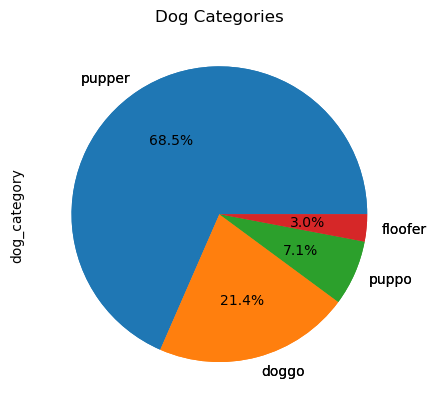

In [89]:
master_df.dog_category.value_counts().plot(kind='pie');
label=['pupper','doggo','puppo','floofer']
plt.pie(master_df.dog_category.value_counts(), labels=label, autopct='%1.1f%%')
plt.title('Dog Categories');

Our second insight we will look at one of the predicitions made and see which breed of dog was most often correctly predicted. We will use p1 for our analysis.

In [85]:
true_p1=master_df.query('p1_dog == True')
false_p1=master_df.query('p1_dog == False')
true_p1.p1.value_counts()

Labrador_Retriever    86
Cardigan              69
Golden_Retriever      69
Pomeranian            36
French_Bulldog        34
                      ..
Beaver                 1
Computer_Keyboard      1
Feather_Boa            1
Goose                  1
Komondor               1
Name: p1, Length: 190, dtype: int64

In [86]:
false_p1.p1.value_counts()

Golden_Retriever               13
Chihuahua                      11
Toy_Poodle                      9
Labrador_Retriever              9
Doormat                         8
                               ..
Ibizan_Hound                    1
Sombrero                        1
Handkerchief                    1
German_Short-Haired_Pointer     1
Mud_Turtle                      1
Name: p1, Length: 308, dtype: int64

In [112]:
(true_p1.p1.value_counts()/master_df.p1.value_counts())['Labrador_Retriever']

0.9052631578947369

For our third insight we will look at were the top 5 highest rated dogs in our tweets.

In [114]:
master_df['dog_rating'].nlargest(5)

770     177.600000
1821     42.000000
528       7.500000
403       3.428571
586       2.700000
Name: dog_rating, dtype: float64

In [115]:
list=[770,1821,528,403,586]
master_df.loc[list]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_rating,dog_category,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count
770,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,177.600000,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,...,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2772,5569,3200943
1821,670842764863651840,2015-11-29 05:52:33+00:00,iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,NaN,42.000000,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,...,False,Accordion,0.094075,False,Drumstick,0.061113,False,4324,7989,3201008
528,786709082849828864,2016-10-13 23:23:56+00:00,iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,Logan,7.500000,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,...,True,Persian_Cat,0.122978,False,Chow,0.102654,True,7069,20296,3200901
403,810984652412424192,2016-12-19 23:06:23+00:00,iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",Sam,3.428571,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,...,True,Tibetan_Mastiff,0.036708,True,Labrador_Retriever,0.025823,True,1655,5927,3200896
586,778027034220126208,2016-09-20 00:24:34+00:00,iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,Sophie,2.700000,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,...,True,Cocker_Spaniel,0.015950,True,Lhasa,0.006519,True,1885,7320,3200810


In [131]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg")

In [125]:
Image(url= "https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg")

In [126]:
Image(url= "https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg")

In [127]:
Image(url= "https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg")

In [128]:
Image(url= "https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg")

### Insights:
1. I found that pupper was the most common category with 68.5% followed by doggo with 21.4%, puppo with 7.1%, and finally floofer with 3%

2. We are able to see that the most often dog that was correctly predicted in p1 was Labrador_Retriever with 86 correct predictions and a correct prediction rate of 90.5%

3. Looking at the top five dogs it we have a patriot dog taking the spot of highest ratings followed by SnoopDogg and then a few cute dogs in the next three spots. It does seem that people like to highly rate dogs dressed up given that 3/5 in the top five have some sort of costume on. Two of the top five also had a holiday theme to them with one being a raindeer for the winter holidays and the other being patriotic for the 4th of July.